# 911 Calls Capstone Project



* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

**Import numpy and pandas**

**Import visualization libraries and set %matplotlib inline**

**Read in the csv file as a dataframe called df**

**Check the info() of the df**

**Check the head of df**

## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

**What are the top 5 townships (twp) for 911 calls?**

**Take a look at the 'title' column, how many unique title codes are there?**

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

**What is the most common Reason for a 911 call based off of this new column?**

**Now use seaborn to create a countplot of 911 calls by Reason.**

**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**


**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

**Now do the same for Month:**

# Note: *It is missing some months! 9,10, and 11 are not there.*

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

*Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.*

**Now create a simple plot off of the dataframe indicating the count of calls per month.**

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. **

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

**Now create a HeatMap using this new DataFrame.**

**Now create a clustermap using this DataFrame.**

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

**Data and Setup**

In [ ]:
#Import numpy and pandas
#Import visualization libraries and set %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read in the csv file as a dataframe called df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA ANALYST PYTHON/calls.csv')
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [ ]:
#Check the info() of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
#Check the info() of the df
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**Basic Questions**

In [ ]:
#What are the top 5 zipcodes for 911 calls?
top_5_zipcodes = df.sort_values(by =['zip'])
top_5_zipcodes.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
8367,41.167156,-76.874030,MAIN; ; Station 308A; 2016-01-02 @ 13:01:30;,17752.0,EMS: UNKNOWN MEDICAL EMERGENCY,2016-01-02 13:06:00,NaN,MAIN,1
41689,40.453790,-75.459977,MILL HILL RD & ORCHARD RD; LEHIGH COUNTY; Sta...,18036.0,EMS: RESPIRATORY EMERGENCY,2016-03-26 07:22:00,LEHIGH COUNTY,MILL HILL RD & ORCHARD RD,1
26763,40.456517,-75.463066,ORCHARD RD & SCHOOL HOUSE LN; LEHIGH COUNTY; ...,18036.0,EMS: CHOKING,2016-02-15 16:07:01,LEHIGH COUNTY,ORCHARD RD & SCHOOL HOUSE LN,1
95602,40.403330,-75.510632,COLONIAL DR & HAMILTON RD; EAST GREENVILLE; 20...,18041.0,Traffic: VEHICLE ACCIDENT -,2016-08-14 09:42:02,EAST GREENVILLE,COLONIAL DR & HAMILTON RD,1
88215,40.392254,-75.515893,CHURCH RD; UPPER HANOVER; Station 369; 2016-0...,18041.0,EMS: VEHICLE ACCIDENT,2016-07-26 16:02:02,UPPER HANOVER,CHURCH RD,1


In [ ]:
#What are the top 5 townships (twp) for 911 calls?
top_5_townships = df.sort_values(by = ['twp'])
top_5_townships.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
69567,40.087121,-75.093740,HUNTINGDON PIKE & PASADENA AVE; ABINGTON; 2016...,19046.0,Fire: FIRE ALARM,2016-06-08 14:21:02,ABINGTON,HUNTINGDON PIKE & PASADENA AVE,1
31828,40.122134,-75.132821,EASTON RD & HESTON ST; ABINGTON; 2016-02-27 @ ...,19001.0,Traffic: VEHICLE ACCIDENT -,2016-02-27 16:12:03,ABINGTON,EASTON RD & HESTON ST,1
31834,40.121341,-75.133677,SUSQUEHANNA RD; ABINGTON; Station 383; 2016-0...,NaN,EMS: VEHICLE ACCIDENT,2016-02-27 16:32:01,ABINGTON,SUSQUEHANNA RD,1
31835,40.127630,-75.144742,SUSQUEHANNA RD & ARTMAN ST; ABINGTON; 2016-02-...,19038.0,Traffic: VEHICLE ACCIDENT -,2016-02-27 16:32:01,ABINGTON,SUSQUEHANNA RD & ARTMAN ST,1
70555,40.107400,-75.113206,THE FAIRWAY & RYDAL RD; ABINGTON; Station 38...,19046.0,EMS: HEAD INJURY,2016-06-10 20:42:01,ABINGTON,THE FAIRWAY & RYDAL RD,1


In [ ]:
#Take a look at the 'title' column, how many unique title codes are there?
unique_title = df['title'].nunique()
unique_title

110

**Creating new features**

In [ ]:
#In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.
#Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.
new_column = lambda x: x.split(':')[0]
df = df.assign(Reason = df['title'].apply(new_column))
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thusday,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thusday,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,Thusday,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,Thusday,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,Thusday,EMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,11,8,Wednesday,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,11,8,Wednesday,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,11,8,Wednesday,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,11,8,Wednesday,EMS


In [ ]:
#What is the most common Reason for a 911 call based off of this new column?
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

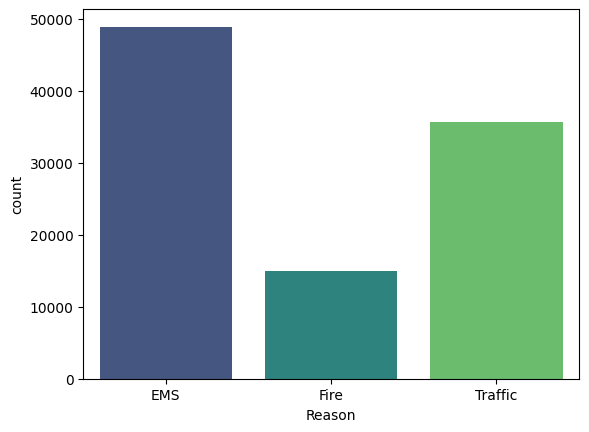

In [ ]:
#Now use seaborn to create a countplot of 911 calls by Reason.
sns.countplot(x = 'Reason', data = df, palette='viridis')

In [ ]:
#Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?
type(df['timeStamp'].iloc[0])

str

In [ ]:
#You should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects.
df['timeStamp'] = pd.to_datetime(df['timeStamp'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
time = df['timeStamp'].iloc[0]
time.hour

17

Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,11,8,2
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,11,8,2
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,11,8,2
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,11,8,2


Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:

In [ ]:
weekmap = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thusday',4:'Friday',5:'Saturday',6:'Sunday'}
df['Day of Week'] = df['Day of Week'].apply(lambda x: weekmap[x])
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thusday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thusday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,Thusday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,Thusday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,Thusday
...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,11,8,Wednesday
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,11,8,Wednesday
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,11,8,Wednesday
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,11,8,Wednesday


Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

<Axes: xlabel='Day of Week', ylabel='count'>

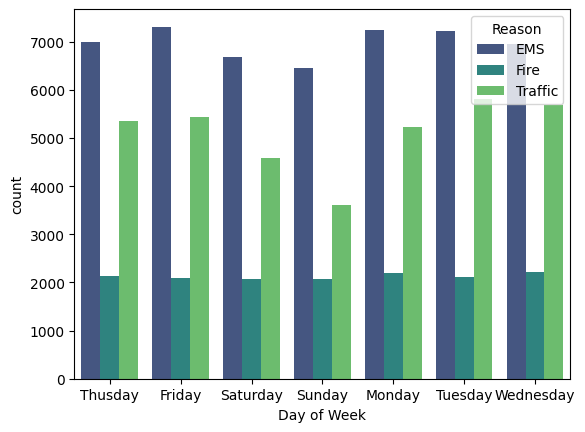

In [ ]:
sns.countplot(x='Day of Week', data=df, palette='viridis', hue = 'Reason')

Now do the same for month

<Axes: xlabel='Month', ylabel='count'>

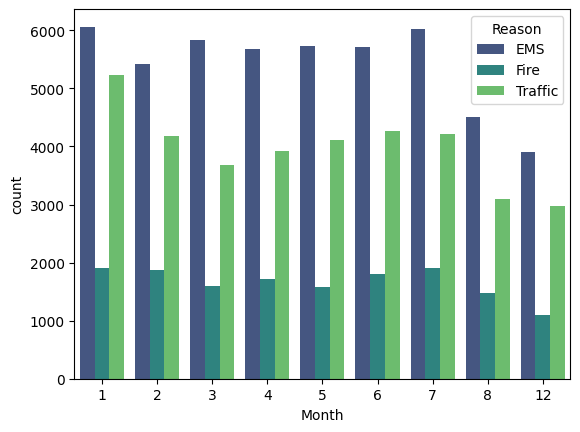

In [ ]:
sns.countplot(x = 'Month', data=df, palette='viridis', hue='Reason')

You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...

Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.

In [ ]:
byMonth = df.groupby('Month').count()
byMonth.head(13)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Day of Week,Reason
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


Now create a simple plot off of the dataframe indicating the count of calls per month.

<Axes: xlabel='Month'>

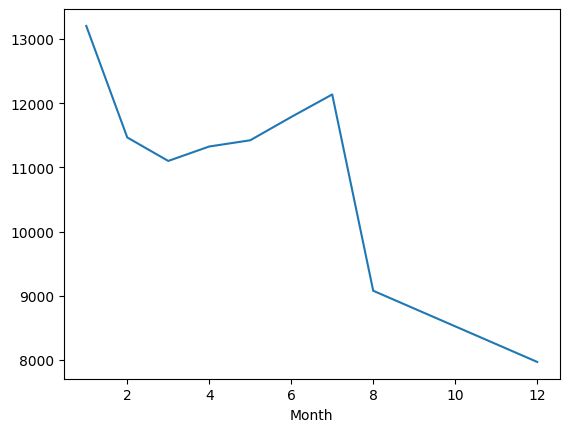

In [ ]:
byMonth['lat'].plot()

Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.



In [ ]:
#reset the index to a column.
byMonth = byMonth.reset_index()
byMonth.head(12)

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Day of Week,Reason
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


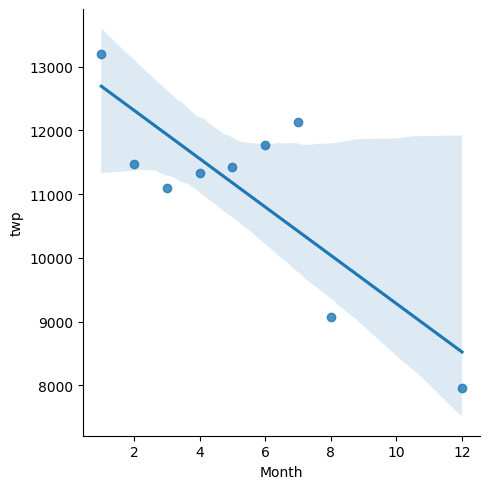

In [ ]:
#use seaborn's lmplot() to create a linear fit on the number of calls per month.
sns.lmplot(x='Month', y='twp', data=byMonth)

Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.

note:<built-in method date of Timestamp object at 0...> is not suported
therfor use .strftime()function

In [ ]:
#Create a new column
df['Date'] = df['timeStamp'].apply(lambda x: x.strftime('%d-%m-%Y'))

In [ ]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of Week,Reason,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,Thusday,EMS,10-12-2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,Thusday,EMS,10-12-2015


Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

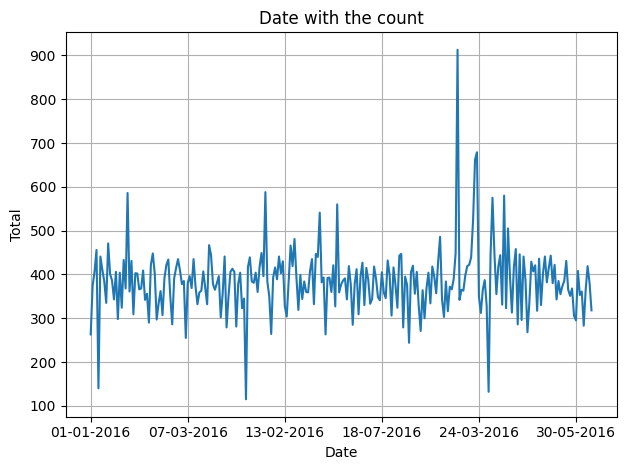

In [ ]:
df.groupby('Date').count()['title'].plot()
plt.title('Date with the count')
plt.xlabel('Date')
plt.ylabel('Total')
plt.grid(True)
plt.tight_layout()

Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

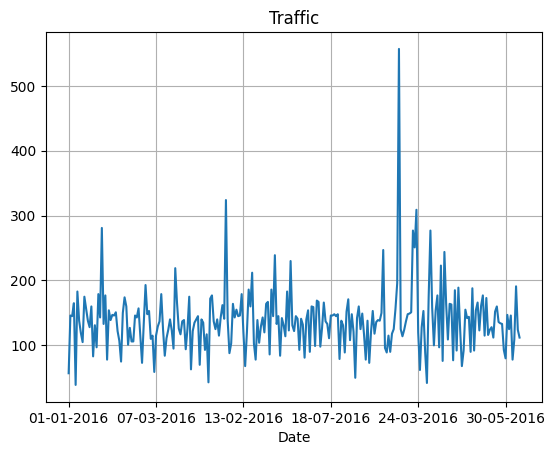

In [ ]:
import matplotlib.pyplot as plt
traffic = df[df['Reason'] == 'Traffic']
traffic.groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.grid(True)

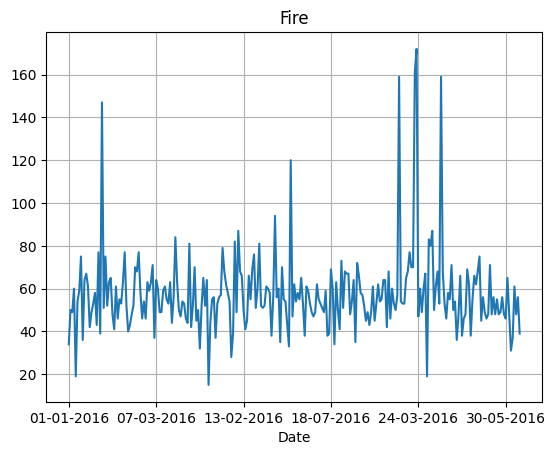

In [ ]:
fire = df[df['Reason'] == 'Fire']
fire.groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.grid(True)

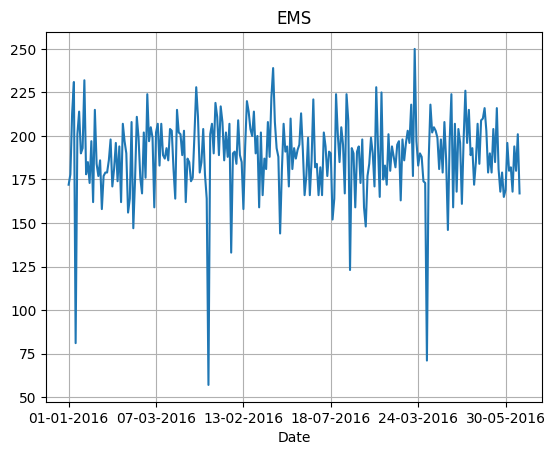

In [ ]:
ems = df[df['Reason']  == 'EMS']
ems.groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.grid(True)

Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method. Reference the solutions if you get stuck on this!

In [ ]:
#restructure dataframe
dayofweek_hour = df.groupby(['Day of Week','Hour']).count().unstack()['Reason']
dayofweek_hour.head(7)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thusday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Now create a HeatMap using this new DataFrame.



Text(0.5, 1.0, 'Day of Week by Hour')

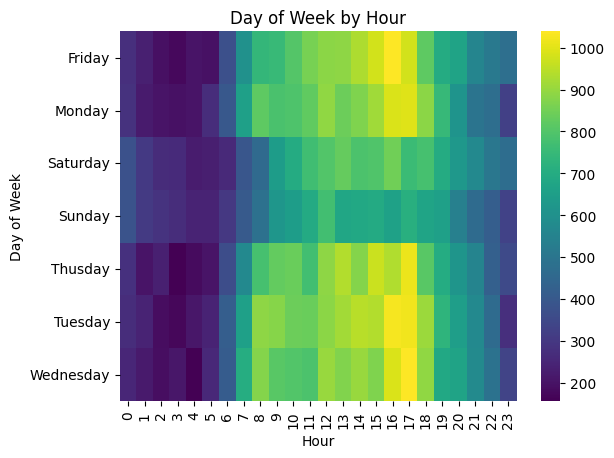

In [ ]:
sns.heatmap(dayofweek_hour, cmap='viridis')
plt.title('Day of Week by Hour')

Now create a clustermap using this DataFrame.



Text(0.5, 1.0, 'Day of Week by Hour')

<Figure size 1200x600 with 0 Axes>

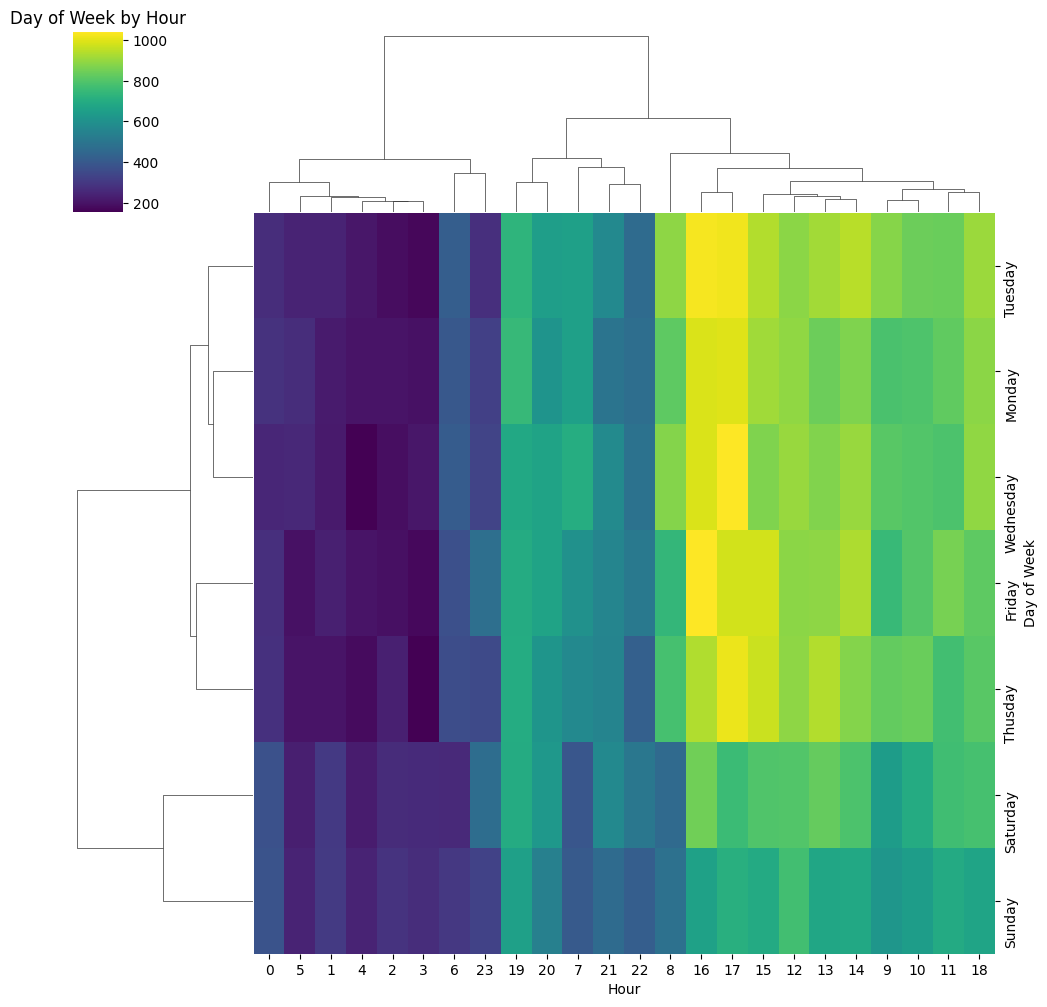

In [ ]:
plt.figure(figsize=(12,6))
sns.clustermap(dayofweek_hour, cmap='viridis')
plt.title('Day of Week by Hour')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [ ]:
dayofweek_month = df.groupby(['Day of Week','Month']).count().unstack()['Reason']
dayofweek_month.head(7)

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thusday,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tuesday,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wednesday,1700,1903,1889,1517,1538,2058,1717,1295,1262


Text(0.5, 1.0, 'Day of Week by Month')

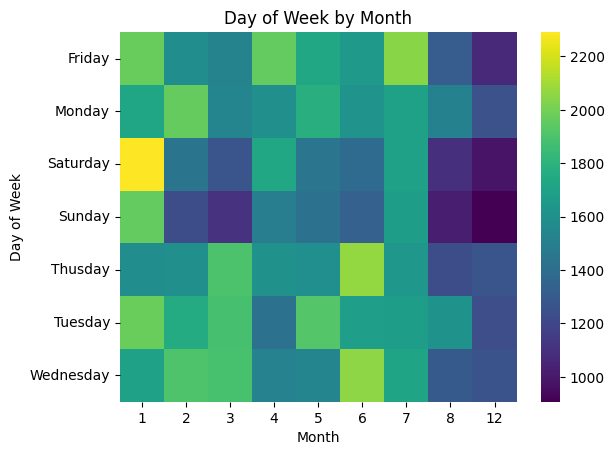

In [ ]:
sns.heatmap(dayofweek_month, cmap='viridis')
plt.title('Day of Week by Month')

Text(0.5, 1.0, 'Day of Week by Month')

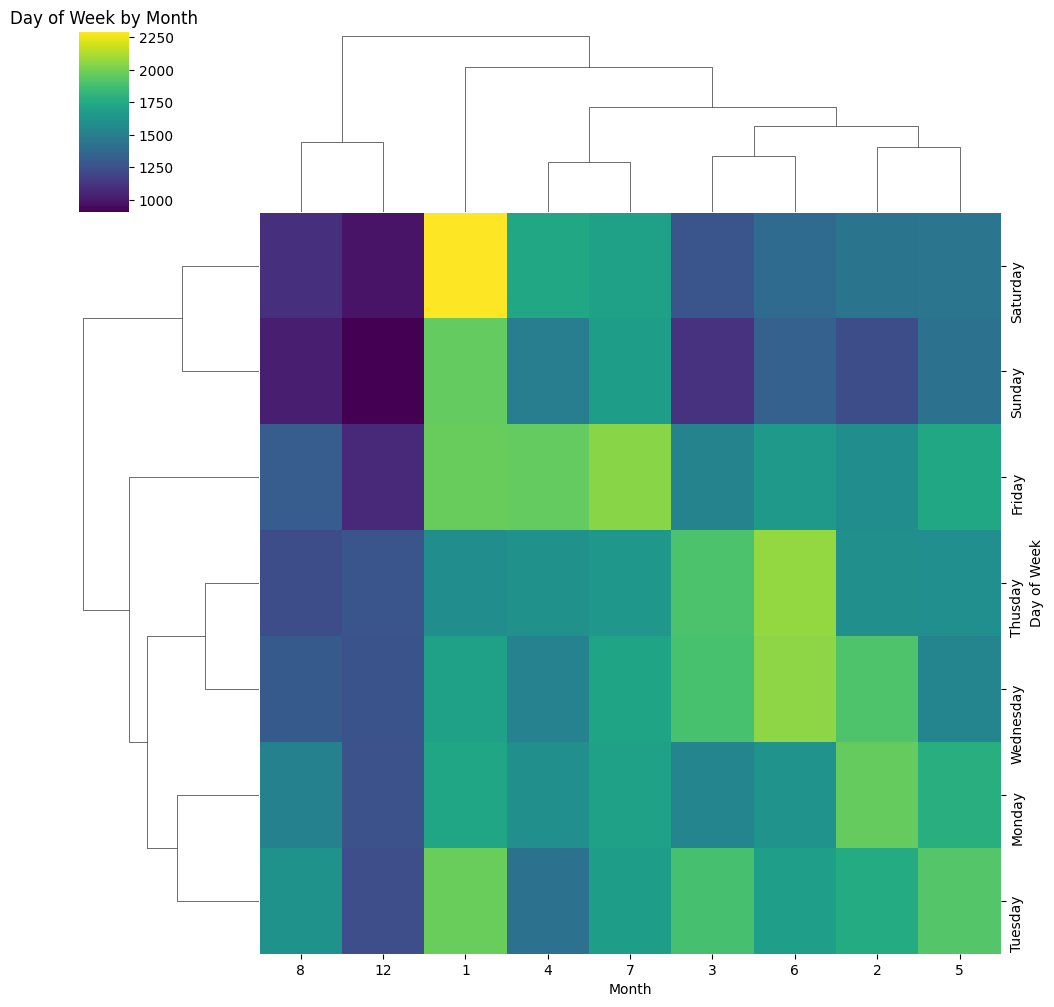

In [ ]:
sns.clustermap(dayofweek_month, cmap='viridis')
plt.title('Day of Week by Month')